In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*.2 + np.random.rand(len(dates))*50
ts = pd.Series(values, index=dates)

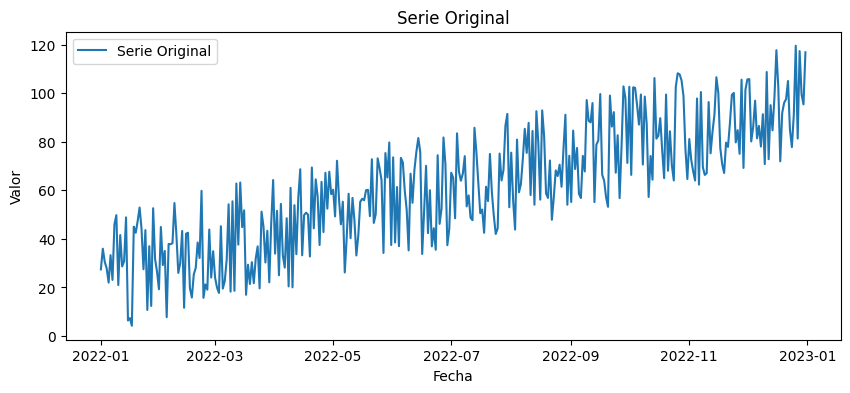

In [ ]:
# Gráfica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Original')
plt.legend()
plt.show()

In [ ]:
# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(ts, model='additive')

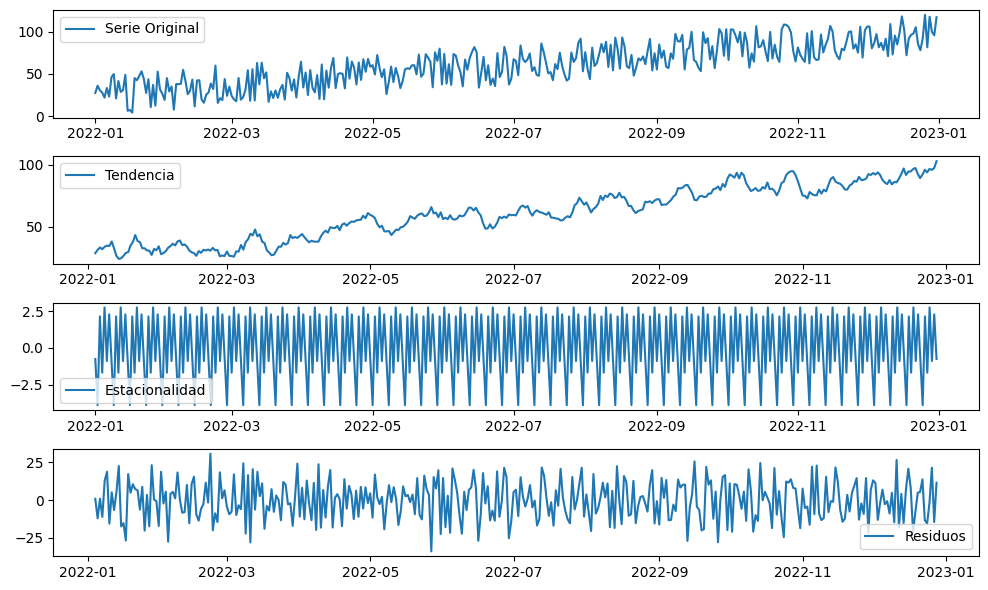

In [ ]:
# Gráfica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()

# Graficá de la tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

# Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

# Gráfica de los residuos
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

Ejemplo con un dataset de kaggle

In [ ]:
from io import StringIO
data = pd.read_csv('updated_daily_minimum_temperatures.csv')
df = pd.read_csv('updated_daily_minimum_temperatures.csv', names=['Date', 'Daily minimum temperatures'], skiprows=1)

# Conversión de las fechas
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Conversión de las temperaturas diarias
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')

In [ ]:
ts1 = pd.Series(df['Daily minimum temperatures'])

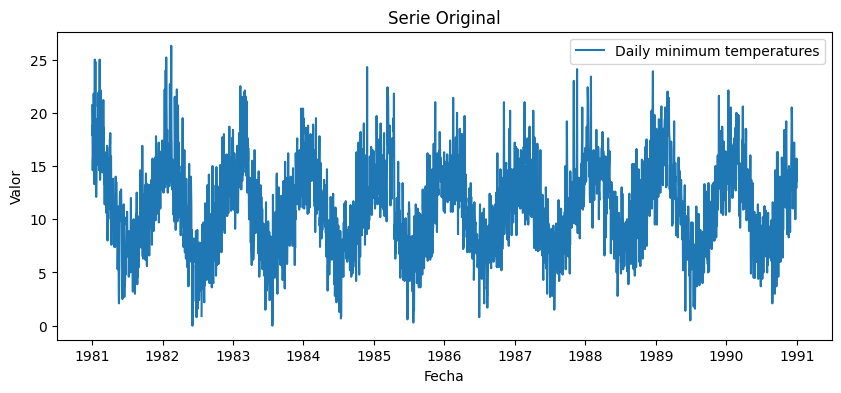

In [ ]:
# Gráfica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(ts1, label='Daily minimum temperatures')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Original')
plt.legend()
plt.show()

In [ ]:
# Descomposición de la serie de tiempo
ts2 = ts1.interpolate(method='linear')  # Reemplaza los datos nulos por interpolados

# Se infiere la frecuencia de la serie de tiempo
ts2 = ts2.asfreq(pd.infer_freq(ts2.index))

ts2 = ts2.fillna(ts2.mean())

decomposition2 = seasonal_decompose(ts2, model='additive')

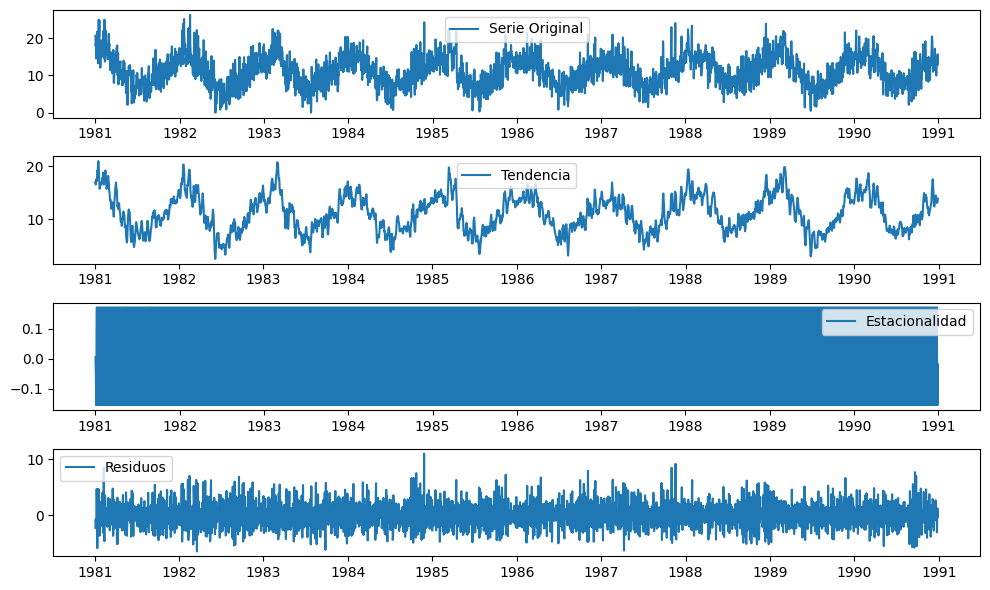

In [ ]:
# Gráfica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts2, label='Serie Original')
plt.legend()

# Graficá de la tendencia
plt.subplot(412)
plt.plot(decomposition2.trend, label='Tendencia')
plt.legend()

# Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(decomposition2.seasonal, label='Estacionalidad')
plt.legend()

# Gráfica de los residuos
plt.subplot(414)
plt.plot(decomposition2.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento
train, test = train_test_split(ts2, test_size=0.2, shuffle=False)

# Modelo ARIMA
model = ARIMA(train, order=(10, 1, 10))
model_fit = model.fit()

# Predicción
forecast = model_fit.forecast(steps=len(test))

# Métricas
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)

print("MSE:", mse)
print("R2:", r2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 31.36316175133181
R2: -0.8648313591211008
